### **Principal Component Analysis [PCA] :**

In [1396]:
import numpy as np
from numpy.linalg import eig
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler
from sklearn.decomposition import PCA

%matplotlib inline

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [1398]:
# 1. Define Data: 
df = pd.read_csv('Wholesale customers data.csv')
df['KEY'] = range(len(df))
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,KEY
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,2
3,1,3,13265,1196,4221,6404,507,1788,3
4,2,3,22615,5410,7198,3915,1777,5185,4


In [1400]:
df.Region.max()

3

In [1402]:
df_1 = df.copy()
df_1.head()
df_1

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,KEY
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,2
3,1,3,13265,1196,4221,6404,507,1788,3
4,2,3,22615,5410,7198,3915,1777,5185,4
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,435
436,1,3,39228,1431,764,4510,93,2346,436
437,2,3,14531,15488,30243,437,14841,1867,437
438,1,3,10290,1981,2232,1038,168,2125,438


In [1404]:
df_1 = df_1.drop(columns=['Channel', 'Region', 'KEY'])
df_1

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [1406]:
scaler = StandardScaler()
scaler.fit(df_1)
scaled_data = scaler.transform(df_1)

In [1408]:
pca = PCA(n_components=.85)

In [1410]:
pca.fit(scaled_data)

PCA(n_components=0.85)

In [1412]:
x_pca = pca.transform(scaled_data)
x_pca

array([[ 0.19329055, -0.30509996, -0.14087845, -0.48643154],
       [ 0.4344199 , -0.32841262,  0.31900662, -0.17883036],
       [ 0.81114323,  0.8150957 ,  1.52341562, -1.25408154],
       ...,
       [ 3.46570362, -1.03983801, -0.71316141,  0.0334078 ],
       [-0.91802273, -0.03004659,  0.25840805, -0.52457824],
       [-1.10513709, -0.86133787,  0.30515404, -0.11437678]])

In [1414]:
scaled_data.shape

(440, 6)

In [1416]:
x_pca.shape

(440, 4)

In [1418]:
# Access explained variance and eigenvectors (components)
eigenvalues = pca.explained_variance_ # This gives the eigenvalues
eigenvectors = pca.components_ # This gives the eigenvectors

# Optionally, sort the eigenvalues and corresponding eigenvectors
idx = eigenvalues.argsort()[::-1] # Sort in descending order

# Sort the eigenvalues and eigenvectors
eigenvalues_1 = eigenvalues[idx]
eigenvectors_1 = eigenvectors[:, idx]

In [1420]:
eigenvalues_1

array([2.65099857, 1.70646229, 0.74175057, 0.56501435])

In [1422]:
pca.explained_variance_

array([2.65099857, 1.70646229, 0.74175057, 0.56501435])

In [1424]:
pca.explained_variance_ratio_

array([0.44082893, 0.283764  , 0.12334413, 0.09395504])

In [1426]:
pca.explained_variance_ratio_.sum()

0.9418920905750293

In [1428]:
df_deducted = df_1.iloc[:,0:4]

In [1430]:
projected_data_1 = abs(np.dot(df_deducted,eigenvectors_1))
projected_data_1

array([[  551.11318599,  8147.10569859,  5131.1610641 ,  8064.28082074],
       [ 2707.06461305,  5086.93820889,  1804.41869762,  9419.08896768],
       [ 1888.14036776,  4450.00685794,  1815.3479952 ,  8928.73546287],
       ...,
       [15868.74743058, 10997.42657089,  2923.01915084, 15942.13592559],
       [  571.52685341,  5818.30545728,  5539.2490496 ,  2933.72205476],
       [ 1038.20221283,  1806.36991211,  1101.17503851,  1678.32562082]])

In [1432]:
New_Feature = pd.DataFrame(projected_data_1, columns = ['PCA_1','PCA_2','PCA_3','PCA_4'])
New_Feature['KEY'] = range(len(New_Feature))
New_Feature.head()

,PCA_1,PCA_2,PCA_3,PCA_4,KEY
0,551.11,8147.11,5131.16,8064.28,0
1,2707.06,5086.94,1804.42,9419.09,1
2,1888.14,4450.01,1815.35,8928.74,2
3,3744.01,7027.00,7730.37,7085.72,3
4,2947.31,12871.11,11944.34,8758.06,4


In [1434]:
New_Feature['PCA_Combined'] = New_Feature['PCA_1'] + New_Feature['PCA_2'] + New_Feature['PCA_3'] + New_Feature['PCA_4'] 

In [1436]:
import plotly.express as px
import plotly.graph_objs as go

In [1438]:
px.scatter_3d(data_frame=New_Feature , x = 'PCA_1', y = 'PCA_2', z = 'PCA_3', color='PCA_Combined',
                         title = 'Principal Component Analysis Wholesale Customer',width = 800, height = 600)

In [1440]:
# Merge on the 'ID' column
merged_master_df = pd.merge(New_Feature, df, on='KEY', how='inner')
merged_master_df.head()

,PCA_1,PCA_2,PCA_3,PCA_4,KEY,PCA_Combined,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,551.11,8147.11,5131.16,8064.28,0,21893.66,2,3,12669,9656,7561,214,2674,1338
1,2707.06,5086.94,1804.42,9419.09,1,19017.51,2,3,7057,9810,9568,1762,3293,1776
2,1888.14,4450.01,1815.35,8928.74,2,17082.23,2,3,6353,8808,7684,2405,3516,7844
3,3744.01,7027.00,7730.37,7085.72,3,25587.09,1,3,13265,1196,4221,6404,507,1788
4,2947.31,12871.11,11944.34,8758.06,4,36520.82,2,3,22615,5410,7198,3915,1777,5185


In [1442]:
New_Dataframe_Wholesale_Customer = merged_master_df.drop(labels = ['Fresh',	'Milk',	'Grocery',	'Frozen',	'Detergents_Paper',	'Delicassen'], axis = 1, errors = 'ignore')

In [1444]:
New_Dataframe_Wholesale_Customer.head()

,PCA_1,PCA_2,PCA_3,PCA_4,KEY,PCA_Combined,Channel,Region
0,551.11,8147.11,5131.16,8064.28,0,21893.66,2,3
1,2707.06,5086.94,1804.42,9419.09,1,19017.51,2,3
2,1888.14,4450.01,1815.35,8928.74,2,17082.23,2,3
3,3744.01,7027.00,7730.37,7085.72,3,25587.09,1,3
4,2947.31,12871.11,11944.34,8758.06,4,36520.82,2,3


In [1446]:
X = New_Dataframe_Wholesale_Customer.copy()

### **Clustering Analysis:**

#### **1. KMeans++**

In [1450]:
X = New_Dataframe_Wholesale_Customer.iloc[:,0:4]
X.head()

,PCA_1,PCA_2,PCA_3,PCA_4
0,551.11,8147.11,5131.16,8064.28
1,2707.06,5086.94,1804.42,9419.09
2,1888.14,4450.01,1815.35,8928.74
3,3744.01,7027.00,7730.37,7085.72
4,2947.31,12871.11,11944.34,8758.06


**Scaling the numercic values of beer_df DataFrame**

In [1453]:
scaler_1 = MinMaxScaler()

In [1455]:
scaled_X = scaler_1.fit_transform(X)
scaled_X

array([[0.0102057 , 0.12593263, 0.08461016, 0.12976864],
       [0.05192779, 0.07737807, 0.02955467, 0.15197624],
       [0.03607992, 0.06727212, 0.02973554, 0.14393851],
       ...,
       [0.30663338, 0.17115763, 0.0480668 , 0.25890003],
       [0.01060075, 0.08898241, 0.09136375, 0.04567009],
       [0.01963188, 0.0253265 , 0.01791643, 0.02509201]])

In [1457]:
scaled_X_df = pd.DataFrame(scaled_X, columns = ['PCA_1', 'PCA_2', 'PCA_3','PCA_4'])
scaled_X_df.head()

,PCA_1,PCA_2,PCA_3,PCA_4
0,0.01,0.13,0.08,0.13
1,0.05,0.08,0.03,0.15
2,0.04,0.07,0.03,0.14
3,0.07,0.11,0.13,0.11
4,0.06,0.20,0.20,0.14


In [1459]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [1461]:
scores = []
range_1 = range(2,10)

In [1463]:
for k in range_1:
    kmeans = KMeans(n_clusters=k,init='k-means++',max_iter=100,random_state=42)
    lable = kmeans.fit_predict(scaled_X_df)
    silhouette_avg = silhouette_score(scaled_X_df,lable)
    scores.append(silhouette_avg)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

In [1464]:
silhouette_coefficient = {'K':list(range_1),'Silhouette_scores':scores}
silhouette_coefficient

{'K': [2, 3, 4, 5, 6, 7, 8, 9],
 'Silhouette_scores': [0.548804748569291,
  0.5220078869207451,
  0.4384963178403282,
  0.4182545359486829,
  0.39947984769570644,
  0.39183419108532525,
  0.33485696057183184,
  0.32600271292422656]}

In [1467]:
Silhouette_customer_PCA = pd.DataFrame(silhouette_coefficient)
Silhouette_customer_PCA 

,K,Silhouette_scores
0,2,0.55
1,3,0.52
2,4,0.44
3,5,0.42
4,6,0.40
5,7,0.39
6,8,0.33
7,9,0.33


**Optimal K :**

In [1470]:
Silhouette_customer_PCA_sort = Silhouette_customer_PCA.sort_values(by = 'Silhouette_scores', ascending = False)
k = Silhouette_customer_PCA_sort.iloc[0,0]
k
print(f'\033[1m\033[46mOptimal K : {k} \033[0m as per \033[1m\033[4mSilhouette Cofficient Scores\033[0m')

Optimal K : 2  as per Silhouette Cofficient Scores


In [1472]:
import plotly.express as px
import plotly.graph_objs as go

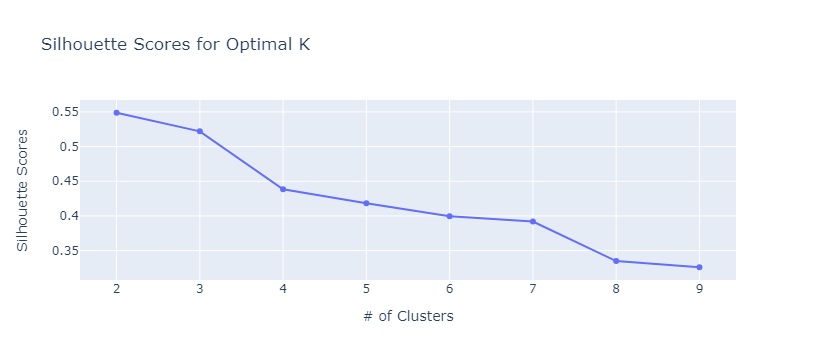

In [1474]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = Silhouette_customer_PCA.K, y = Silhouette_customer_PCA.Silhouette_scores, name='Silhouette Scores Plot'))
fig.update_layout(
    title = 'Silhouette Scores for Optimal K',
    xaxis_title = '# of Clusters',
    yaxis_title = 'Silhouette Scores',
    width = 600,
    height = 300)

In [1476]:
N_Clusters = KMeans(n_clusters=k, init='k-means++', max_iter=100,random_state=48)
N_Clusters.fit(scaled_X_df)
New_Dataframe_Wholesale_Customer['K_Cluster_ID'] = N_Clusters.labels_

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



In [1478]:
New_Dataframe_Wholesale_Customer

,PCA_1,PCA_2,PCA_3,PCA_4,KEY,PCA_Combined,Channel,Region,K_Cluster_ID
0,551.11,8147.11,5131.16,8064.28,0,21893.66,2,3,0
1,2707.06,5086.94,1804.42,9419.09,1,19017.51,2,3,0
2,1888.14,4450.01,1815.35,8928.74,2,17082.23,2,3,0
3,3744.01,7027.00,7730.37,7085.72,3,25587.09,1,3,0
4,2947.31,12871.11,11944.34,8758.06,4,36520.82,2,3,0
...,...,...,...,...,...,...,...,...,...
435,8491.01,17016.50,15100.22,21842.60,435,62450.33,1,3,1
436,749.71,21155.82,22909.21,6485.81,436,51300.56,1,3,1
437,15868.75,10997.43,2923.02,15942.14,437,45731.33,2,3,0
438,571.53,5818.31,5539.25,2933.72,438,14862.80,1,3,0


In [1480]:
px.scatter_3d(New_Dataframe_Wholesale_Customer, x = 'PCA_1', y = 'PCA_2', z = 'PCA_3', color = New_Dataframe_Wholesale_Customer['K_Cluster_ID'], 
                         title = 'K-Means Cluster for Wholesale Customer', labels = {'K_Cluster_ID' : 'Cluster_ID'},width = 800, height = 600)

#### **2. DBSCAN**

In [1482]:
from sklearn.cluster import DBSCAN

In [1484]:
scaler_2 = Normalizer()

In [1486]:
scaled_X_2 = scaler_2.fit_transform(X)
scaled_X_2

array([[0.04383859, 0.64806588, 0.40816095, 0.64147753],
       [0.24195278, 0.4546618 , 0.16127584, 0.84186199],
       [0.18305988, 0.43143918, 0.17600248, 0.86566301],
       ...,
       [0.62950591, 0.43626285, 0.11595482, 0.6324172 ],
       [0.06667816, 0.67880259, 0.64624599, 0.34226772],
       [0.35885091, 0.62436534, 0.38061724, 0.58010729]])

In [1488]:
scaled_X_2_df = pd.DataFrame(scaled_X_2, columns = ['PCA_1', 'PCA_2', 'PCA_3','PCA_4'])
scaled_X_2_df.head()

,PCA_1,PCA_2,PCA_3,PCA_4
0,0.04,0.65,0.41,0.64
1,0.24,0.45,0.16,0.84
2,0.18,0.43,0.18,0.87
3,0.28,0.53,0.59,0.54
4,0.15,0.65,0.60,0.44


**Silhouette Scores for Epsilon and Min_Samples**

In [1491]:
result = []

In [1493]:
eps_range = np.arange(0.01,0.95,0.01)
sample = range(2,20)

In [1495]:
for eps in eps_range:
    for min_sample in sample:
        db_labels = DBSCAN(eps=eps,min_samples=min_sample).fit(scaled_X_2_df).labels_
        if len(set(db_labels)) > 1 and len(set(db_labels)) != len(db_labels):
            scores = silhouette_score(scaled_X_2_df,db_labels)
            result.append({'minimum_sample': min_sample, 'Epsilon': eps, 'Silhouette_Scores': scores})

In [1496]:
silhouette_table_DB = pd.DataFrame(result)
silhouette_table_DB_sort = silhouette_table_DB.sort_values(by='Silhouette_Scores', ascending = False)
silhouette_table_DB_sort.head(10)

,minimum_sample,Epsilon,Silhouette_Scores
167,19,0.11,0.48
148,18,0.10,0.48
147,17,0.10,0.48
149,19,0.10,0.44
129,17,0.09,0.43
130,18,0.09,0.42
131,19,0.09,0.42
108,14,0.08,0.41
109,15,0.08,0.40
249,19,0.16,0.40


In [1497]:
eps = silhouette_table_DB_sort.iloc[0,1]
eps

0.11

In [1498]:
min_sample = silhouette_table_DB_sort.iloc[0,0]
min_sample

19

In [1499]:
dbscan = DBSCAN(eps = eps, min_samples=min_sample)
New_Dataframe_Wholesale_Customer['DBSCAN_Cluster_ID'] = dbscan.fit_predict(scaled_X_df)

In [1500]:
New_Dataframe_Wholesale_Customer.head()

,PCA_1,PCA_2,PCA_3,PCA_4,KEY,PCA_Combined,Channel,Region,K_Cluster_ID,DBSCAN_Cluster_ID
0,551.11,8147.11,5131.16,8064.28,0,21893.66,2,3,0,0
1,2707.06,5086.94,1804.42,9419.09,1,19017.51,2,3,0,0
2,1888.14,4450.01,1815.35,8928.74,2,17082.23,2,3,0,0
3,3744.01,7027.00,7730.37,7085.72,3,25587.09,1,3,0,0
4,2947.31,12871.11,11944.34,8758.06,4,36520.82,2,3,0,0


In [1501]:
px.scatter_3d(New_Dataframe_Wholesale_Customer, x = 'PCA_1', y = 'PCA_2', z = 'PCA_3', color = New_Dataframe_Wholesale_Customer['DBSCAN_Cluster_ID'], 
                         title = 'DBSCAN Cluster for Wholesale Customer', labels = {'DBSCAN_Cluster_ID' : 'Cluster_ID'},width = 800, height = 600)

**3. Hierarchical**

In [1503]:
scaler_3 = StandardScaler()

In [1504]:
scaled_X_3 = scaler_3.fit_transform(X)
scaled_X_3

array([[-0.63660046,  0.13166661, -0.1703052 ,  0.01722357],
       [-0.23133539, -0.31255979, -0.6423567 ,  0.20076374],
       [-0.38527271, -0.40501934, -0.64080588,  0.13433399],
       ...,
       [ 2.24273254,  0.54543081, -0.48363175,  1.08446168],
       [-0.6327632 , -0.20639153, -0.11239913, -0.67782956],
       [-0.54503987, -0.78878046, -0.74214418, -0.84790211]])

In [1505]:
scaled_X_3_df = pd.DataFrame(scaled_X_3, columns = ['PCA_1', 'PCA_2', 'PCA_3','PCA_4'])
scaled_X_3_df.head()

,PCA_1,PCA_2,PCA_3,PCA_4
0,-0.64,0.13,-0.17,0.02
1,-0.23,-0.31,-0.64,0.20
2,-0.39,-0.41,-0.64,0.13
3,-0.04,-0.03,0.20,-0.12
4,-0.19,0.82,0.80,0.11


In [1506]:
from sklearn.cluster import AgglomerativeClustering

In [1507]:
Range = range(2,20)
scores_1 = []

In [1508]:
for r in Range:
    h = AgglomerativeClustering(n_clusters=r, affinity='euclidean', linkage = 'ward')
    label = h.fit_predict(scaled_X_3_df)
    silhouette_avg = silhouette_score(scaled_X_3_df,label)
    scores_1.append(silhouette_avg)

In [1509]:
silhouette_coefficient = {'K':list(Range),'Silhouette_scores':scores_1}
Silhouette_H = pd.DataFrame(silhouette_coefficient)
pd.set_option('display.float_format', lambda x: '{:.6f}'.format(x))
Silhouette_H_sort = Silhouette_H.sort_values(by = 'Silhouette_scores', ascending = False)
Silhouette_H_sort.head(10)

,K,Silhouette_scores
0,2,0.658778
1,3,0.620855
2,4,0.378334
4,6,0.314353
3,5,0.310898
6,8,0.307724
7,9,0.306913
5,7,0.302576
15,17,0.279633
16,18,0.278468


In [1510]:
clusters = Silhouette_H_sort.iloc[0,0]
clusters
print(f'\033[1m\033[46mOptimal Clusters : {clusters} \033[0m as per \033[1m\033[4mSilhouette Cofficient Scores\033[0m')

Optimal Clusters : 2  as per Silhouette Cofficient Scores


In [1511]:
h_cluster = AgglomerativeClustering(n_clusters=clusters, affinity='euclidean',linkage = 'ward')
New_Dataframe_Wholesale_Customer['h_cluster_ID'] = h_cluster.fit_predict(scaled_X_df)

In [1512]:
New_Dataframe_Wholesale_Customer.head()

,PCA_1,PCA_2,PCA_3,PCA_4,KEY,PCA_Combined,Channel,Region,K_Cluster_ID,DBSCAN_Cluster_ID,h_cluster_ID
0,551.113186,8147.105699,5131.161064,8064.280821,0,21893.660769,2,3,0,0,1
1,2707.064613,5086.938209,1804.418698,9419.088968,1,19017.510487,2,3,0,0,1
2,1888.140368,4450.006858,1815.347995,8928.735463,2,17082.230684,2,3,0,0,1
3,3744.006970,7026.996477,7730.368803,7085.716362,3,25587.088611,1,3,0,0,1
4,2947.313386,12871.111944,11944.338131,8758.058039,4,36520.821500,2,3,0,0,0


In [1513]:
px.scatter_3d(New_Dataframe_Wholesale_Customer, x = 'PCA_1', y = 'PCA_2', z = 'PCA_3', color = New_Dataframe_Wholesale_Customer['h_cluster_ID'], 
                         title = 'Hierarchical Cluster for Wholesale Customer', labels = {'h_cluster_ID' : 'Cluster_ID'},width = 800, height = 600)

In [1514]:
import scipy.cluster.hierarchy as sch

Text(0, 0.5, 'Euclidean Distance')

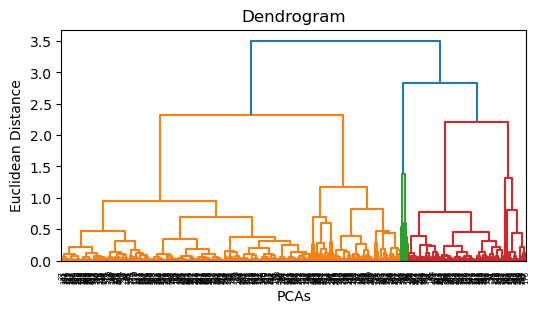

In [1515]:
plt.figure(figsize=(6,3))
dendogram = sch.dendrogram(sch.linkage(scaled_X,method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('PCAs')
plt.ylabel('Euclidean Distance')

In [1517]:
Final_data = pd.merge(New_Dataframe_Wholesale_Customer, df, on='KEY', how='inner')

In [1518]:
Final_data

,PCA_1,PCA_2,PCA_3,PCA_4,KEY,PCA_Combined,Channel_x,Region_x,K_Cluster_ID,DBSCAN_Cluster_ID,h_cluster_ID,Channel_y,Region_y,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,551.113186,8147.105699,5131.161064,8064.280821,0,21893.660769,2,3,0,0,1,2,3,12669,9656,7561,214,2674,1338
1,2707.064613,5086.938209,1804.418698,9419.088968,1,19017.510487,2,3,0,0,1,2,3,7057,9810,9568,1762,3293,1776
2,1888.140368,4450.006858,1815.347995,8928.735463,2,17082.230684,2,3,0,0,1,2,3,6353,8808,7684,2405,3516,7844
3,3744.006970,7026.996477,7730.368803,7085.716362,3,25587.088611,1,3,0,0,1,1,3,13265,1196,4221,6404,507,1788
4,2947.313386,12871.111944,11944.338131,8758.058039,4,36520.821500,2,3,0,0,0,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,8491.008999,17016.501456,15100.217443,21842.602945,435,62450.330843,1,3,1,-1,1,1,3,29703,12051,16027,13135,182,2204
436,749.706666,21155.824215,22909.214067,6485.810077,436,51300.555026,1,3,1,0,0,1,3,39228,1431,764,4510,93,2346
437,15868.747431,10997.426571,2923.019151,15942.135926,437,45731.329078,2,3,0,-1,1,2,3,14531,15488,30243,437,14841,1867
438,571.526853,5818.305457,5539.249050,2933.722055,438,14862.803415,1,3,0,0,1,1,3,10290,1981,2232,1038,168,2125


In [1525]:
Final_data = Final_data.drop(['Channel_x', 'Region_x'], axis = 1)

In [1526]:
Final_data = Final_data.rename(columns = {'Channel_y': 'Channel', 'Region_y': 'Region'})

In [1538]:
Final_data

,PCA_1,PCA_2,PCA_3,PCA_4,KEY,PCA_Combined,K_Cluster_ID,DBSCAN_Cluster_ID,h_cluster_ID,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,551.113186,8147.105699,5131.161064,8064.280821,0,21893.660769,0,0,1,2,3,12669,9656,7561,214,2674,1338
1,2707.064613,5086.938209,1804.418698,9419.088968,1,19017.510487,0,0,1,2,3,7057,9810,9568,1762,3293,1776
2,1888.140368,4450.006858,1815.347995,8928.735463,2,17082.230684,0,0,1,2,3,6353,8808,7684,2405,3516,7844
3,3744.006970,7026.996477,7730.368803,7085.716362,3,25587.088611,0,0,1,1,3,13265,1196,4221,6404,507,1788
4,2947.313386,12871.111944,11944.338131,8758.058039,4,36520.821500,0,0,0,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,8491.008999,17016.501456,15100.217443,21842.602945,435,62450.330843,1,-1,1,1,3,29703,12051,16027,13135,182,2204
436,749.706666,21155.824215,22909.214067,6485.810077,436,51300.555026,1,0,0,1,3,39228,1431,764,4510,93,2346
437,15868.747431,10997.426571,2923.019151,15942.135926,437,45731.329078,0,-1,1,2,3,14531,15488,30243,437,14841,1867
438,571.526853,5818.305457,5539.249050,2933.722055,438,14862.803415,0,0,1,1,3,10290,1981,2232,1038,168,2125


In [1541]:
Final_data = Final_data.rename(columns = {'KEY': 'Customer_ID'})
pd.set_option('display.float_format', '{:.2f}'.format)

In [1542]:
Final_data.head()

,PCA_1,PCA_2,PCA_3,PCA_4,Customer_ID,PCA_Combined,K_Cluster_ID,DBSCAN_Cluster_ID,h_cluster_ID,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,551.11,8147.11,5131.16,8064.28,0,21893.66,0,0,1,2,3,12669,9656,7561,214,2674,1338
1,2707.06,5086.94,1804.42,9419.09,1,19017.51,0,0,1,2,3,7057,9810,9568,1762,3293,1776
2,1888.14,4450.01,1815.35,8928.74,2,17082.23,0,0,1,2,3,6353,8808,7684,2405,3516,7844
3,3744.01,7027.00,7730.37,7085.72,3,25587.09,0,0,1,1,3,13265,1196,4221,6404,507,1788
4,2947.31,12871.11,11944.34,8758.06,4,36520.82,0,0,0,2,3,22615,5410,7198,3915,1777,5185
